# Homework 3
Group member: William Yu(wjy2104), Jiaying Chen(jc5299)

## Task 1 Identify features

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 Based on description of features

First, according to the description of the original dataset, `id` is the entry id of each row which is unique, that is unuseful for predicting price. Besides, the information given by the value of `url` and `region_url` can be replaced by `region`. What's more, `image_url` and `description` are more useful when applying NLP to this task, so we can also drop these columns at this time.

In [12]:
df_original = pd.read_csv("vehicles.csv")
df_drop_1 = df_original.drop(['id', 'url', 'region_url', 'image_url','description'], axis = 1)


### 1.2 Based on statistics

In [13]:
# The general analysis of the rest features
# Number of unique values
# Number of NAN
column_names = ['Feature', 'Unique', 'NAN', 'Percent_of _missing(%)']
df_drop_1_info = pd.DataFrame(columns = column_names)
for column in list(df_drop_1.columns):
    num_unique = len(df_drop_1[column].unique())
    num_nan = df_drop_1[column].isna().sum()
    p_missing = round(num_nan/len(df_drop_1),4)*100
    
    row = {'Feature': column, 'Unique': num_unique, 'NAN': num_nan, 'Percent_of _missing(%)': p_missing}
    df_drop_1_info = df_drop_1_info.append(row, ignore_index=True)
    
df_drop_1_info = df_drop_1_info.sort_values(by ='NAN')
df_drop_1_info

,Feature,Unique,NAN,Percent_of _missing(%)
0,region,403,0,0.00
1,price,17854,0,0.00
17,state,51,0,0.00
2,year,115,1527,0.30
9,title_status,7,3062,0.60
10,transmission,4,3719,0.73
7,fuel,6,3985,0.78
4,model,35853,7989,1.57
18,lat,51489,10292,2.02
19,long,51468,10292,2.02


From the above table, we can see that there is no value in `county`, then we can delete this feature. And it is same to `size`, there are more than 50% missing values. As for `vin`, except 40% missing values, every two rows share a `vin` category averagely, in this case, it can also be classified as a unique id, so we just drop this feature.

In [14]:
df_drop_2 = df_drop_1.drop(['county', 'size', 'vin'], axis = 1)
df_drop_2_info = df_drop_1_info.drop(df_drop_1_info[ df_drop_1_info['Feature'] == 'county'].index, axis = 0)
df_drop_2_info = df_drop_2_info.drop(df_drop_1_info[ df_drop_1_info['Feature'] == 'size'].index, axis = 0)
df_drop_2_info = df_drop_2_info.drop(df_drop_1_info[ df_drop_1_info['Feature'] == 'vin'].index, axis = 0)


indexNames = df_drop_2[ df_drop_2['price'] == 0 ].index
df_drop_2.drop(indexNames, inplace=True)

df_Step1 = df_drop_2

df_sample = df_Step1.sample(frac=0.2, replace=True, random_state=42)

### 1.3 Based on visualization

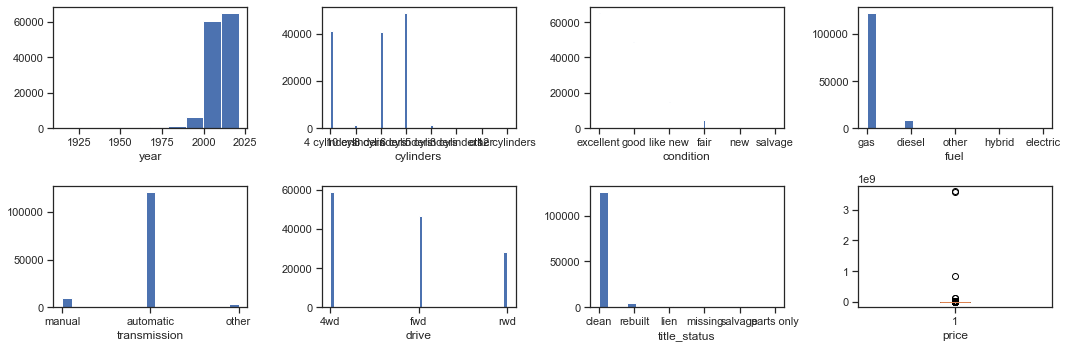

In [15]:
cars_dropped = df_drop_2.dropna()
fig, ax = plt.subplots(2,4, figsize=(15,5))
ax[0,0].hist(cars_dropped.year, bins=10)
ax[0,0].set_xlabel("year")
ax[0,1].hist(cars_dropped.cylinders, bins='auto')
ax[0,1].set_xlabel("cylinders")
ax[0,2].hist(cars_dropped.condition, bins='auto') #one hot encode
ax[0,2].set_xlabel("condition")
ax[0,3].hist(cars_dropped.fuel, bins='auto')
ax[0,3].set_xlabel("fuel")
ax[1,0].hist(cars_dropped.transmission, bins='auto')
ax[1,0].set_xlabel("transmission")
ax[1,1].hist(cars_dropped.drive, bins='auto')
ax[1,1].set_xlabel("drive")
ax[1,2].hist(cars_dropped.title_status, bins='auto')
ax[1,2].set_xlabel("title_status")
ax[1,3].boxplot(cars_dropped.price)
ax[1,3].set_xlabel("price")

plt.tight_layout()

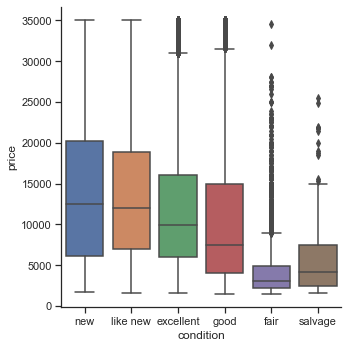

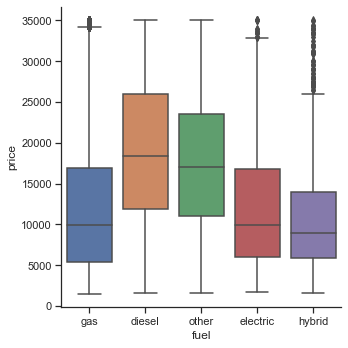

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
q_hi  = df_drop_2["price"].quantile(0.95)
q_low  = df_drop_2["price"].quantile(0.05)
df_filtered = df_drop_2[(df_drop_2["price"] < q_hi)&(df_drop_2["price"] > q_low)]
# less than 10
sns.catplot(x="condition", y="price", kind="box",order=["new", "like new", "excellent", "good", "fair","salvage"], data=df_filtered)
#sns.catplot(x="cylinders", y="price",kind="box", data=df_filtered)
#sns.catplot(x="drive", y="price",kind="box", data=df_filtered)
sns.catplot(x="fuel", y="price",kind="box", data=df_filtered)
#sns.catplot(x="transmission", y="price",kind="box", data=df_filtered)
#sns.catplot(x="title_status", y="price",kind="box", data=df_filtered)
# more than 10
#sns.catplot(x="paint_color", y="price",kind="box", data=df_filtered)
#sns.catplot(x="type", y="price",kind="box", data=df_filtered)

#more than 20
#sns.catplot(x="manufacturer", y="price",kind="box", data=df_filtered)
#sns.catplot(x="state", y="price",kind="box", data=df_filtered)'''

From the box polts of each subcategory in each feature, we can know that for `condition` and `fuel`, the distribution of price depends on each subcategories. 

## Task 2  Preprocessing and Baseline Model

#### 1) Initial features
    'odometer', 'year', 'fuel', 'condition','price'
#### 2) Preprocessing
    · Missing Value: Drop
    · Numeric: StandardScaler
    · Categorical: OneHotEncoder
#### 3) Model
    Linear Regression


In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures, OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Initial feature selection
features_intial = ['odometer', 'year', 'fuel', 'condition','price']

# Selecting features
# Dropping NULL

df_base = df_sample[features_intial]
df_base_sample = df_base.dropna()
indexNames = df_base_sample[ df_base_sample['price'] == 0 ].index
df_base_sample.drop(indexNames, inplace=True)

X_baseline = df_base_sample.drop(['price'], axis = 1)
y_baseline = df_base_sample['price']

/Users/williamyu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
categorical = X_baseline.dtypes == 'object'
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical)   
)

pipe = make_pipeline(preprocess, LinearRegression())
r2_baseline =  cross_val_score(pipe, X_baseline, y_baseline, cv=5, scoring='r2')
print("r2 of baseline: ", np.mean(r2_baseline))

r2 of baseline:  -107.69745756633338


After doing an initial selection of features, appropriate preprocessing and cross-validating a linear regression model, we can get the $R^2$ of this base line model is `-107.70`, the result is so bad.

## Task 3 Feature Engineering

#### 1) Outlier
    Drop outliers in the column `price` (threshold: 0.05 & 0.95)
    
#### 2) Categorical features
    According to the number of categories, we can devide all categorical features into 2 parts:
    ·Less than 15: OneHotEncoder()
        `transmission`, `drive`, `fuel`, `title_status`, `condition`, `cylinders`, `paint_color`, 
        `type`
    ·More than 15: TargetEncoder()
        `manufacturer`, `state`, `region`, `model`:
    
#### 3) Numeric features
    `year`, `odometer`
    `long`: it can be replaced by region and state
    `lat`: it can be replaced by region and state

In [20]:
q_hi  = df_drop_2["price"].quantile(0.95)
q_low  = df_drop_2["price"].quantile(0.05)
df_filtered = df_drop_2[(df_drop_2["price"] < q_hi)&(df_drop_2["price"] > q_low)]

### 3.1 Sample Data (Selecting useful features and dropping outliers of price)

In [21]:
df_eng = df_filtered.drop(['long','lat'], axis = 1)
df_enf_sample = df_eng.sample(frac=0.2, replace=True, random_state=42)

X_eng = df_enf_sample.drop(['price'], axis = 1)
y_eng = df_enf_sample[['price']]

### 3.2 Preprocessing for linear model

1) Numeric features


   ·Dealing with missing value: replacing missing value with median value<br>
   ·Scaler: using MinMaxScaler to scale features
   
   
2) Categorical features


   ·Dealing with missing value: replacing missing value with constant, setting missing value as a new subcategory<br>
   ·Scaler: for features with more than 20 subcategories, using TargetEncoder to scale features and then treat these features as numeric features, hence then using MinMaxScaler to scale these features; and for features with less than 20 subcategories, using OneHotEncoder to scale features

In [12]:
feature_TE = ['region', 'model', 'manufacturer', 'state']
feature_OHE = ['transmission', 'drive', 'fuel', 'title_status', 'condition', 'cylinders', 'paint_color', 'type']

# After targetencoder, those features becoming numeric also need to scale using numeric scaling methods
feature_MM = ['year', 'odometer',
              'region', 'model', 'manufacturer', 'state']

In [13]:
numeric_transformer = make_pipeline(
    (SimpleImputer(strategy = 'median')),
    MinMaxScaler()
)

categorical_transformer = make_pipeline(
    (SimpleImputer(strategy='constant', fill_value='NaN')),
    (OneHotEncoder(handle_unknown = 'ignore')))

### 3.3 Linear Model -- Basic

In [14]:
preprocess_eng = make_column_transformer(
    (numeric_transformer, feature_MM),
    (categorical_transformer, feature_OHE)   
)

pipe = make_pipeline(TargetEncoder(cols = feature_TE), preprocess_eng, LinearRegression())

scores_eng = cross_val_score(pipe, X_eng, y_eng, cv=10, scoring=('neg_root_mean_squared_error'))
print("RMSE after feature engineering: ", -1 * np.mean(scores_eng))

r2_eng = cross_val_score(pipe, X_eng, y_eng, cv=10, scoring=('r2'))
print("R^2 after feature engineering: ", np.mean(r2_eng))

RMSE after feature engineering:  5538.494487959851
R^2 after feature engineering:  0.5513521776123878


### 3.4 Linear Model -- PolynomialFeatures

In [15]:
preprocess_eng = make_column_transformer(
    (numeric_transformer, feature_MM),
    (categorical_transformer, feature_OHE)   
)
pipe_poly = make_pipeline(TargetEncoder(cols = feature_TE), preprocess_eng, PolynomialFeatures(), LinearRegression())
R2_eng_poly = cross_val_score(pipe_poly, X_eng, y_eng, cv=10, scoring=('r2'))
print("R^2 after feature engineering: ", np.mean(R2_eng_poly))

R^2 after feature engineering:  0.7185193243830008


### 3.5 Result

||Baseline|with feature engineering| with feature engineering plus polynomialfeature|
|---|---|---|---|
|$R^2$|-276.5523|0.5514|0.7185|

The table shows the performance of those models, it clearly represents that after creating derived features and performing more in-depth preprocessing and data cleaning, the model is improved. And if we add PolynomialFeatures to the process of preprocessing, we can get a better model.

## Task 4 Any model

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_eng, y_eng, test_size=0.2, random_state = 42)

Using two models for predicting prices: 1) Decission Tree; 2) and GradientBoosting.

### 4.1 Based on feature engineering of Task3

#### 1) Decission Tree

In [19]:
pipe_tree = make_pipeline(TargetEncoder(cols = feature_TE), preprocess_eng, DecisionTreeRegressor())
param_grid_tree = {'decisiontreeregressor__max_depth': range(5, 15, 1)}
grid_tree = GridSearchCV(pipe_tree, param_grid_tree, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_tree.fit(X_train, y_train.values.ravel())
grid_tree.score(X_test, y_test)

0.750012510966741

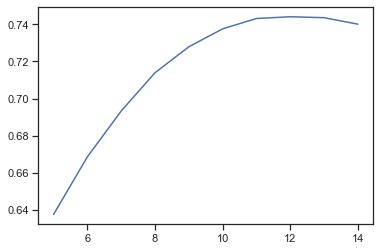

In [20]:
param_tree_grid = grid_tree.cv_results_['param_decisiontreeregressor__max_depth'].data
r2_tree_grid = grid_tree.cv_results_['mean_test_score']
plt.plot(param_tree_grid, r2_tree_grid)

In [21]:
print("Best parameter of max_depth for DecisionTree: ", grid_tree.best_params_)
print("R^2 of decision tree on test data: ", grid_tree.score(X_test, y_test))

Best parameter of max_depth for DecisionTree:  {'decisiontreeregressor__max_depth': 12}
R^2 of decision tree on test data:  0.750012510966741


#### 2) GradientBoosting

In [23]:
pipe_gbrt = make_pipeline(TargetEncoder(cols = feature_TE), preprocess_eng, GradientBoostingRegressor())
param_grid_gbrt = {'gradientboostingregressor__max_depth': range(3, 23, 5)}
grid_gbrt = GridSearchCV(pipe_gbrt, param_grid_gbrt, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_gbrt.fit(X_train, y_train.values.ravel())
grid_gbrt.score(X_test, y_test)

0.8540440120899968

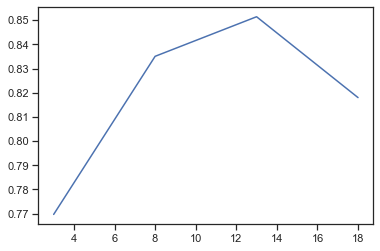

In [24]:
param_gbrt_grid = grid_gbrt.cv_results_['param_gradientboostingregressor__max_depth'].data
r2_gbrt_grid = grid_gbrt.cv_results_['mean_test_score']
plt.plot(param_gbrt_grid, r2_gbrt_grid)

In [25]:
print("Best parameter of max_depth for GradientBoosting: ", grid_gbrt.best_params_)
print("R^2 of GradientBoosting on test data: ", grid_gbrt.score(X_test, y_test))

Best parameter of max_depth for GradientBoosting:  {'gradientboostingregressor__max_depth': 13}
R^2 of GradientBoosting on test data:  0.8540440120899968


### 4.2 Based on other feature engineering

OneHotEncoder for all categorical features.<br>
MinMaxScaler for all numerical features.<br>
No TargetEncoder.

#### 1. DecisionTree

In [51]:

category = X_eng.dtypes == 'object'

preprocess_eng_1 = make_column_transformer(
    (numeric_transformer, ~category),
    (categorical_transformer, category)   
)

pipe_tree_1 = make_pipeline(preprocess_eng_1, DecisionTreeRegressor())

r2_tree_1 = cross_val_score(pipe_tree_1, X_eng, y_eng.values.ravel(), cv=10, scoring=('r2'))
print("R^2 after feature engineering: ", np.mean(r2_tree_1))

R^2 after feature engineering:  0.7639217652947551


In [62]:
param_grid_tree_1 = {'decisiontreeregressor__min_samples_split': range(70, 80, 1)}
grid_tree_1 = GridSearchCV(pipe_tree_1, param_grid_tree_1, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_tree_1.fit(X_train, y_train.values.ravel())
grid_tree_1.score(X_test, y_test)

0.7545535666826517

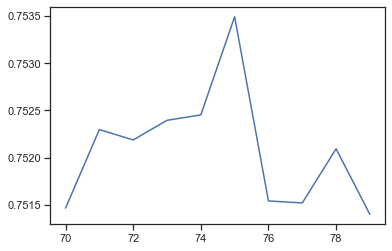

In [63]:
param_tree_grid_1 = grid_tree_1.cv_results_['param_decisiontreeregressor__min_samples_split'].data
r2_tree_grid_1 = grid_tree_1.cv_results_['mean_test_score']
plt.plot(param_tree_grid_1, r2_tree_grid_1)

#### 2. GradientBoosting

In [43]:
pipe_gbrt_1 = make_pipeline(preprocess_eng_1, GradientBoostingRegressor())
param_grid_gbrt_1 = {'gradientboostingregressor__max_depth': range(13, 23, 2)}
grid_gbrt_1 = GridSearchCV(pipe_gbrt_1, param_grid_gbrt_1, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_gbrt_1.fit(X_train, y_train.values.ravel())
grid_gbrt_1.score(X_test, y_test)

0.8485011674711813

In [230]:
grid_gbrt_1.best_params_

{'gradientboostingregressor__max_depth': 17}

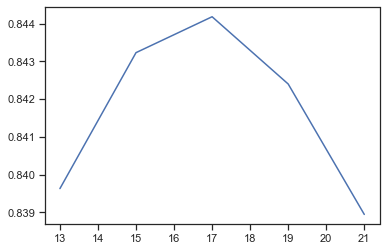

In [44]:
param_gbrt_grid_1 = grid_gbrt_1.cv_results_['param_gradientboostingregressor__max_depth'].data
r2_gbrt_grid_1 = grid_gbrt_1.cv_results_['mean_test_score']
plt.plot(param_gbrt_grid_1, r2_gbrt_grid_1)

### 4.3 Results

$R^2$ of different models on different feature engineering.

||Same Feature Engineering with Task3| Other Feature Engineering|
|---|---|---|
|Decision Tree|0.7500|0.7546|
|GradientBoosting|0.8540|0.8485|

From the above table, we can see that either DecisionTree or GradientBoosting is better than Linear Regression. <br>
For DecisionTree, the second feature engineering can make the model perform better, but the influence is slight. <br>
For GradientBoosting, the first feature engineering is better than the second one, although the difference is small.<br>
Anyway, from this table, we can know GradientBoosting with the first feature engineeing(that is the one got from task 3) is the best model.

## Task 5  Feature Selections

### 5.1 Univariant Statistics

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [144]:

categorical_OE = make_pipeline(
    (SimpleImputer(strategy='constant', fill_value='NaN')),
    (OrdinalEncoder()))

preprocess_FSelection = make_column_transformer(
    ((SimpleImputer(strategy = 'median')), ~category),
    (categorical_OE, category)   
)
preprocess_FSelection.fit(X_train)

X_train_OE = preprocess_FSelection.transform(X_train)
#X_test_OE = preprocess_FSelection.transform(X_test)

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train_OE, y_train.values.ravel())

SelectKBest(k='all', score_func=<function f_regression at 0x000002B309B9B0D8>)

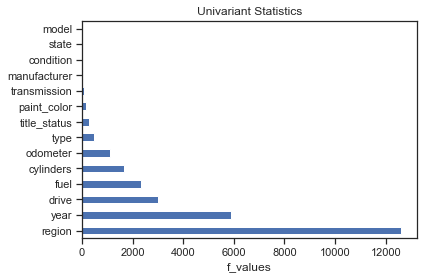

In [146]:
feature_chi2 = pd.Series(fs.scores_, index=X_train.columns)
feature_chi2.nlargest(len(fs.scores_)).plot(kind='barh')
plt.title("Univariant Statistics")
plt.xlabel("f_values")
plt.show()

From the figure `Univariant Statistics`, we can see that `model`, `state`, `condition`, `manufacturer`, `transmission` and `paint_color` have small f-values, that means we can try to drop these features. And `region`, `year`, `drive` are most influential.

### 5.2 Feature selection based on feature importance

#### 1. DecisionTree

(1) Feature Importance

In [96]:
feature_OHE = grid_tree.best_estimator_.steps[1][1].transformers_[1][1].named_steps['onehotencoder'].get_feature_names(feature_OHE)

In [99]:
feature_import = grid_tree.best_estimator_.steps[2][1].feature_importances_

In [100]:
all_features_eng_OHE = np.concatenate((feature_MM, feature_OHE), axis=None)

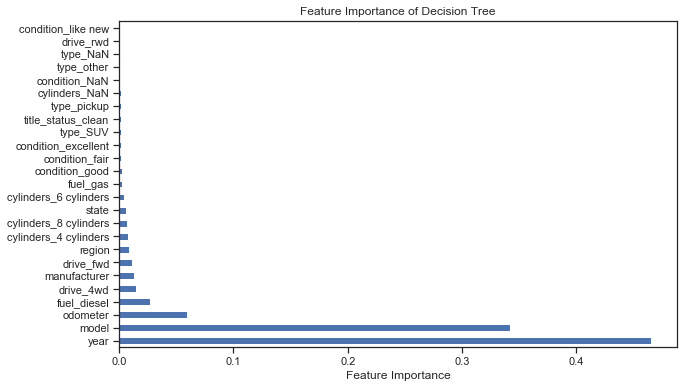

In [153]:
feat_importances = pd.Series(feature_import, index=all_features_eng_OHE)
plt.figure(figsize=(10,6))
feat_importances.nlargest(25).plot(kind='barh')
plt.title("Feature Importance of Decision Tree")
plt.xlabel("Feature Importance")
plt.show()

Combining the result got from `Univariant Statistics` and the result from Feature Importance of Decision Tree, we can drop `paint_color`.

For DecisionTree model, `year`, `model` and `odometer` are most influential.

(2) DecisionTree after Feature Selection

In [192]:
feature_OHE_selection = ['drive', 'fuel', 'title_status', 'condition', 'cylinders', 'type', 'paint_color']

preprocess_selection = make_column_transformer(
    (numeric_transformer, feature_MM),
    (categorical_transformer, feature_OHE_selection)   
)

param_grid_tree_selection = {'decisiontreeregressor__max_depth': range(5, 15, 1)}

pipe_tree_selection = make_pipeline(TargetEncoder(cols = feature_TE), preprocess_selection, DecisionTreeRegressor())

grid_tree_selection = GridSearchCV(pipe_tree_selection, param_grid_tree_selection, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_tree_selection.fit(X_train, y_train.values.ravel())
grid_tree_selection.score(X_test, y_test)

0.7504254542178441

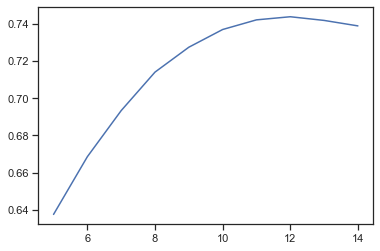

In [193]:
plt.plot(grid_tree_selection.cv_results_['param_decisiontreeregressor__max_depth'].data, grid_tree_selection.cv_results_['mean_test_score'])

Based on the analysis of feature selection, we can drop `transmission`, which would not decrease the performance of DecisionTree even improve the model. The value of $R^2$ increases from `0.7500` to `0.7504`.

#### 2. GradientBoosting

(1) Feature Importance

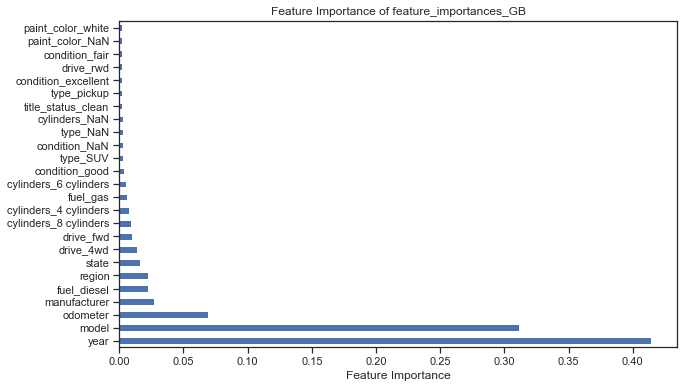

In [176]:
feature_importances_GB = pd.Series(grid_gbrt.best_estimator_.steps[2][1].feature_importances_, index=all_features_eng_OHE)
plt.figure(figsize=(10,6))
feature_importances_GB.nlargest(25).plot(kind='barh')
plt.title("Feature Importance of feature_importances_GB")
plt.xlabel("Feature Importance")
plt.show()

Combining the result got from Univariant Statistics and the result from Feature Importance of GradientBoosting, we can drop `transmission` and `paint color`.

For GradientBoosting, `year`, `model` and `odometer` are most influential.

(2) GradientBoosting after feature selection

In [196]:
feature_OHE_selection_GB = ['drive', 'fuel', 'title_status', 'condition', 'cylinders', 'type']


preprocess_selection_GB = make_column_transformer(
    (numeric_transformer, feature_MM),
    (categorical_transformer, feature_OHE_selection_GB)   
)

param_grid_gbrt_selection = {'gradientboostingregressor__max_depth': range(3, 23, 5)}

pipe_gbrt_selection = make_pipeline(TargetEncoder(cols = feature_TE), preprocess_selection_GB, GradientBoostingRegressor())


grid_gbrt_selection = GridSearchCV(pipe_gbrt_selection, param_grid_gbrt_selection, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_gbrt_selection.fit(X_train, y_train.values.ravel())
grid_gbrt_selection.score(X_test, y_test)

0.8536025548640691

After dropping `transmission` and `paint color`, the performance has degraded slightly from `0.8540` to `0.8536`.

### 5.3 Feature selection based on RFE

In [222]:
from sklearn.feature_selection import RFE

In [285]:
rfe_2 = RFE(GradientBoostingRegressor(), n_features_to_select = 10)
rfe_2.fit(X_train_OE, y_train.values.ravel())
rfe_2.ranking_

array([1, 1, 5, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 2])

In [286]:
X_train.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

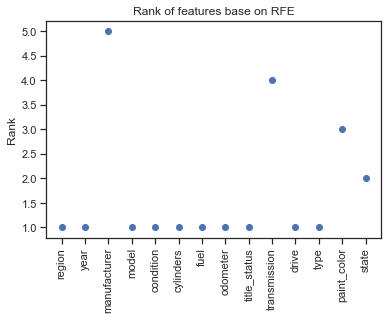

In [288]:
plt.scatter(X_train.columns, rfe_2.ranking_)
plt.title("Rank of features base on RFE")
plt.ylabel("Rank")
plt.xticks(rotation=90)
plt.show()

1) Drop 4 features: `transmission`, `manufacturer`, `paint_color`, `state`

In [275]:
feature_TE_REF = ['region', 'model']
feature_OHE_REF = ['drive', 'fuel', 'title_status', 'condition', 'cylinders', 'type']
feature_MM_REF = ['year', 'odometer',
              'region', 'model']

preprocess_selection_GB_ref = make_column_transformer(
    (numeric_transformer, feature_MM_REF),
    (categorical_transformer, feature_OHE_REF)   )

param_grid_gbrt_selection_ref = {'gradientboostingregressor__max_depth': range(3, 23, 5)}
pipe_gbrt_selection_ref = make_pipeline(TargetEncoder(cols = feature_TE_REF), preprocess_selection_GB_ref, GradientBoostingRegressor())

grid_gbrt_selection_ref = GridSearchCV(pipe_gbrt_selection_ref, param_grid_gbrt_selection_ref, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_gbrt_selection_ref.fit(X_train, y_train.values.ravel())
grid_gbrt_selection_ref.score(X_test, y_test)

0.842359327641256

2) Drop 3 features: `transmission`, `manufacturer`, `paint_color`

In [278]:
#Drop 3 features: transmission, manufacture, paint_color
feature_TE_REF = ['region', 'model', 'state']
feature_OHE_REF = ['drive', 'fuel', 'title_status', 'condition', 'cylinders', 'type']

# After targetencoder, those features becoming numeric also need to scale using numeric scaling methods
feature_MM_REF = ['year', 'odometer',
              'region', 'model', 'state']
''


preprocess_selection_GB_ref = make_column_transformer(
    (numeric_transformer, feature_MM_REF),
    (categorical_transformer, feature_OHE_REF)   
)

param_grid_gbrt_selection_ref = {'gradientboostingregressor__max_depth': range(3, 23, 5)}

pipe_gbrt_selection_ref = make_pipeline(TargetEncoder(cols = feature_TE_REF), preprocess_selection_GB_ref, GradientBoostingRegressor())


grid_gbrt_selection_ref = GridSearchCV(pipe_gbrt_selection_ref, param_grid_gbrt_selection_ref, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_gbrt_selection_ref.fit(X_train, y_train.values.ravel())
grid_gbrt_selection_ref.score(X_test, y_test)

0.8426328788235495

3) Drop 2 features: `transmission`, `manufacturer`

In [282]:
# Drop 2 features: manufacture, transmission
feature_TE_REF = ['region', 'model', 'state']
feature_OHE_REF = ['drive', 'fuel', 'title_status', 'condition', 'cylinders', 'paint_color', 'type']

# After targetencoder, those features becoming numeric also need to scale using numeric scaling methods
feature_MM_REF = ['year', 'odometer',
              'region', 'model', 'state']

preprocess_selection_GB_ref = make_column_transformer(
    (numeric_transformer, feature_MM_REF),
    (categorical_transformer, feature_OHE_REF)   
)

param_grid_gbrt_selection_ref = {'gradientboostingregressor__max_depth': range(3, 23, 5)}

pipe_gbrt_selection_ref = make_pipeline(TargetEncoder(cols = feature_TE_REF), preprocess_selection_GB_ref, GradientBoostingRegressor())


grid_gbrt_selection_ref = GridSearchCV(pipe_gbrt_selection_ref, param_grid_gbrt_selection_ref, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_gbrt_selection_ref.fit(X_train, y_train.values.ravel())
grid_gbrt_selection_ref.score(X_test, y_test)

0.8433202550481826

### 5.4 Results

|Without feature selection| Based on RFE<br>(Drop 4 features)|Based on RFE<br>(Drop 3 features)|Based on RFE<br>(Drop 2 features)| Based on feature importance <br>and univariate statistics|
|---|---|---|---|---|
|0.8485|0.8424|0.8426|0.8433|0.8536|

From the above table, when we use RFE to select features, the performance is slightly deregraded, but the degradation which is within the acceptable range can make the model more faster and easier to interpret, hence it's ok to drop 4 most irrelative features, that is we just select `region`, `year`, `model`, `condition`, `cylinders`, `fuel`, `odometer`, `title_status`, `drive`, `type`.<br>
Besides, if we select feature based on feature importace of gradientboosting(because we use this model to training data) and the univariate statistics got from the original sample data after encodering categorical features by OrdinalEncoder, we can drop two features, and the performance is almost same to the performance of the best model without feature selection. However, it is not obvious when selecting features based on feature importance, because those categorical features are encoder by OneHotEncoder.

## Task 6 An explainable model

### 6.1 Decision Tree

In [207]:
feature_OHE_EM = ['drive', 'cylinders']
feature_TE_EM = ['model']
feature_MM_EM = ['year', 'odometer',
              'model']

preprocess_EM = make_column_transformer(
    (numeric_transformer, feature_MM_EM),
    (categorical_transformer, feature_OHE_EM)   
)

param_grid_tree_EM = {'decisiontreeregressor__max_leaf_nodes': range(8, 15, 1)}

pipe_tree_EM = make_pipeline(TargetEncoder(cols = feature_TE_EM), preprocess_EM, DecisionTreeRegressor())

grid_tree_EM = GridSearchCV(pipe_tree_EM, param_grid_tree_EM, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_tree_EM.fit(X_train, y_train.values.ravel())
grid_tree_EM.score(X_test, y_test)

0.5826518858702587

In [208]:
grid_tree_EM.best_params_

{'decisiontreeregressor__max_leaf_nodes': 14}

In [220]:
param_grid_tree_EM = {'decisiontreeregressor__max_leaf_nodes': range(100, 120, 5)}

pipe_tree_EM = make_pipeline(TargetEncoder(cols = feature_TE), preprocess_selection, DecisionTreeRegressor())
grid_tree_EM = GridSearchCV(pipe_tree_EM, param_grid_tree_EM, cv=KFold(5), return_train_score=True, scoring=('r2'))
grid_tree_EM.fit(X_train, y_train.values.ravel())
grid_tree_EM.score(X_test, y_test)

0.7076462178164394

In [221]:
grid_tree_EM.best_params_

{'decisiontreeregressor__max_leaf_nodes': 115}

To create an explainable model, we have to be willing to tradeoff accuracy for this dataset. Just using DecisionTree as an example, when we set the value of the parameter `max_leaf_nodes` at a small range that makes the tree only has small number of leaves so that we can easily interpret the tree, but we can see when `max_leaf_nodes` = 14, $R^2$ has already been reduced around 0.2, it is a big drop for the performance of this model. If we want to get a better model which is nearly as good as the best DecisionTree model, we need to set the parameter `max_leaf_nodes` to a large number, even when we set it to 115, which is impossible to explain the tree, $R^2$ is just 0.7076 which is less than the best model ($R^2$ is around 0.75).

### 6.2 Linear Regression

We can try doing the same with a linear regression model: 

In [107]:
# do some preprocessing again
cars = df_original.loc[df_original.price != 0]
cars.rename(columns={'size': 'sizes'}, inplace=True)
cars.drop(["id", "url", "region_url", "county", "image_url", "description", "vin"], axis=1, inplace=True)

/Users/williamyu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/williamyu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
col = ['price', 'year', 'manufacturer', 'model', 'condition', 
                 'odometer', 'title_status', 'sizes', 'type', 'drive', 'region', 'state']
cars_4 = cars.loc[:, col]

In [98]:
upper_lim = cars_4.price.quantile(.95)
lower_lim = cars_4.price.quantile(.05)
cars_4 = cars_4[(cars_4.price < upper_lim) & (cars_4.price > lower_lim)]
cars_4 = cars_4.sample(frac=0.2, replace=True, random_state=0)
cars_4.shape

(83715, 12)

In [99]:
# impossible to have a car with no mileage
# car with extremely high mileage ignore for now
upper_lim = cars_4.odometer.quantile(.99)
lower_lim = cars_4.odometer.quantile(.01)
cars_4 = cars_4[(cars_4.odometer < upper_lim) & (cars_4.odometer > lower_lim)]
cars_4.shape

(68411, 12)

In [100]:
data_4 = cars_4.loc[:, cars_4.columns != 'price']
target_4 = cars_4.loc[:, 'price']

In [101]:
si = SimpleImputer(strategy='median')
si = si.fit(data_4[['year']])
data_4['year'] = si.transform(data_4[['year']]).ravel()

si_cat = SimpleImputer(strategy='constant')
si_cat = si_cat.fit(data_4[['manufacturer']])
data_4['manufacturer'] = si_cat.transform(data_4[['manufacturer']]).ravel()

si_cat = SimpleImputer(strategy='constant')
si_cat = si_cat.fit(data_4[['model']])
data_4['model'] = si_cat.transform(data_4[['model']]).ravel()

si_cat = SimpleImputer(strategy='constant')
si_cat = si_cat.fit(data_4[['condition']])
data_4['condition'] = si_cat.transform(data_4[['condition']]).ravel()

si_cat = SimpleImputer(strategy='constant')
si_cat = si_cat.fit(data_4[['title_status']])
data_4['title_status'] = si_cat.transform(data_4[['title_status']]).ravel()

si_cat = SimpleImputer(strategy='constant')
si_cat = si_cat.fit(data_4[['sizes']])
data_4['sizes'] = si_cat.transform(data_4[['sizes']]).ravel()

si_cat = SimpleImputer(strategy='constant')
si_cat = si_cat.fit(data_4[['type']])
data_4['type'] = si_cat.transform(data_4[['type']]).ravel()

si_cat = SimpleImputer(strategy='constant')
si_cat = si_cat.fit(data_4[['drive']])
data_4['drive'] = si_cat.transform(data_4[['drive']]).ravel()

/Users/williamyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/williamyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/williamyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [102]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data_4, target_4, random_state=0)

In [103]:
# try targetencode all variables for ease of interpretation
targetencode = ['manufacturer', 'model', 'condition', 'title_status', 'sizes', 'type',
               'drive', 'region', 'state']
cont = ['year', 'manufacturer', 'model', 'condition', 'odometer', 'title_status', 'sizes', 'type', 'drive',
        'region', 'state']

We can use SequentialFeatureSelector to select our features:

In [104]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LinearRegression(), forward=False, k_features=5)
preprocess = make_column_transformer((StandardScaler(), cont))
pipe = make_pipeline(TargetEncoder(cols=targetencode), preprocess, sfs)
pipe.fit(X_train_4, y_train_4)

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['manufacturer', 'model', 'condition',
                                     'title_status', 'sizes', 'type', 'drive',
                                     'region', 'state'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),
                ('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop'...
                                                   'sizes', 'type', 'drive',
                                                   'region', 'state'])],
                                   verbose=False)),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(clone_estimator=True, cv=5,
                                           estimator=LinearRegression(copy_X=True

In [105]:
it = pipe.steps[2][1].k_feature_idx_
x = []
for i in range(len(it)):
    x.append(cont[it[i]])
x

['year', 'model', 'odometer', 'type', 'drive']

In [106]:
pipe.steps[2][1].k_score_

0.6786184538475354

So although linear model is much more interpretable than compared to our linear model in task 3, we can see that it certainly has some accuracy to be desired. So there is an inherent tradeoff to making a model; whether you want your model to be more accurate or more easily interpretable. The key objective in many problems is to find a model that can achieve both.